In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
data=pd.read_csv("../input/creditcard/creditcard.csv")

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
X=data.drop("Class", axis=1)
Y=data['Class']

In [11]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Splitting the data into train and test data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Building Neural Network

In [21]:
#Early Stopping 
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [22]:
model=keras.Sequential()
#input layer
model.add(Dense(units=256, activation='relu', input_dim=30))
layers.BatchNormalization()
#hidden layers
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='binary_accuracy')

In [25]:
history=model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=5000
        , callbacks=[early_stopping])

Epoch 1/30
46/46 [==============================] - 1s 31ms/step - loss: 11.9364 - binary_accuracy: 0.9347 - val_loss: 3.3823 - val_binary_accuracy: 0.9981
Epoch 2/30
46/46 [==============================] - 1s 29ms/step - loss: 19.9982 - binary_accuracy: 0.9328 - val_loss: 6.3715 - val_binary_accuracy: 0.9981
Epoch 3/30
46/46 [==============================] - 1s 29ms/step - loss: 51.8003 - binary_accuracy: 0.9328 - val_loss: 10.9818 - val_binary_accuracy: 0.9981
Epoch 4/30
46/46 [==============================] - 1s 29ms/step - loss: 9.4398 - binary_accuracy: 0.9547 - val_loss: 5.9328 - val_binary_accuracy: 0.9981
Epoch 5/30
46/46 [==============================] - 1s 29ms/step - loss: 9.6590 - binary_accuracy: 0.9546 - val_loss: 0.9221 - val_binary_accuracy: 0.9981
Epoch 6/30
46/46 [==============================] - 1s 30ms/step - loss: 11.0251 - binary_accuracy: 0.9546 - val_loss: 0.1046 - val_binary_accuracy: 0.9981
Epoch 7/30
46/46 [==============================] - 1s 30ms/step 

# Training Graph

Minimum validation loss: 0.031308356672525406


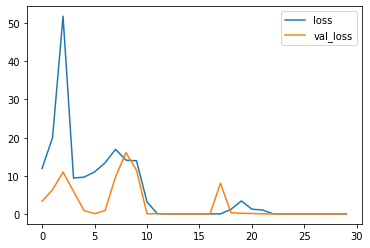

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model Accuracy

In [27]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(Y_train, y_TrainAccuracy)

0.9983102547784678

In [28]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(Y_test, y_TestAccuracy)

0.998121554720691

# We have got an accuracy of 99.8% using DeepLearning